In [26]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.interpolate import CubicSpline
from numpy.polynomial.polynomial import polyval

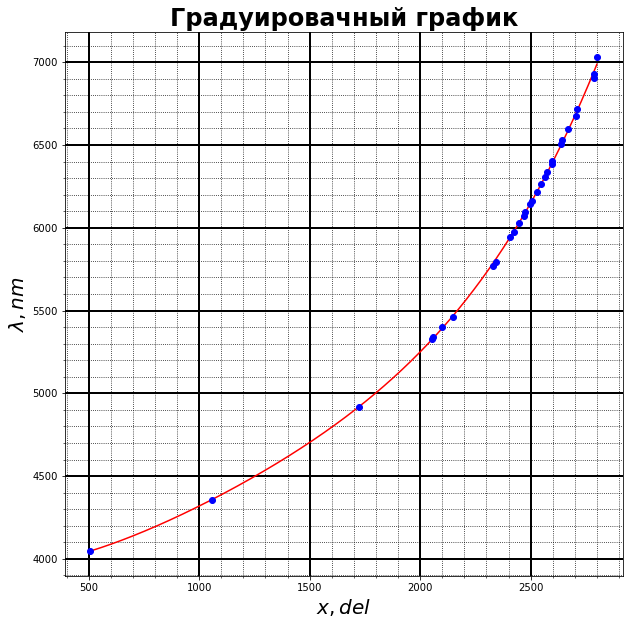

In [52]:
lambd = np.array([7032, 6929, 6717, 6678, 6599, 6533, 6507, 6402, 6383, 6334, 6305, 6267, 6217, 6164, 6143,
                 6096, 6074, 6030, 5976, 5945, 5882, 5852, 5401, 5341, 5331, 6907, 6234, 5791, 5770, 
                  5461, 4916, 4358, 4047], dtype = 'float')
x = np.array([2802, 2788, 2710, 2706, 2670, 2644, 2638, 2599, 2598, 2574, 2566, 2546, 2528, 2506, 2498,
             2476, 2468, 2448, 2424, 2406, 2478, 2463, 2100, 2056, 2054, 2786, 2448, 2342, 2330, 2148, 1724,
             1058, 506], dtype = 'float')
lambd_cut = np.delete(lambd, [26, 20, 21])
x_cut = np.delete(x, [26, 20, 21])
x_new = np.sort(x_cut)

lambd_new = np.sort(lambd_cut)
# cs = CubicSpline(x_new, lambd_new)
x_lol = np.linspace(510, 2800, 1000)
p, C_p = np.polyfit(x_new, lambd_new, 4, cov = True)
f = np.poly1d(p)

# Do the interpolation for plotting:
# t = np.linspace(510, 2800, 500)
# t = np.append(t, [2668, 1672, 1031, 622])
t = np.array([2668, 1672, 1031, 622], dtype = 'float')
# Matrix with rows 1, t, t**2, ...:
n = 4
TT = np.vstack([t**(n-i) for i in range(n+1)]).T
yi = np.dot(TT, p)  # matrix multiplication calculates the polynomial values
C_yi = np.dot(TT, np.dot(C_p, TT.T)) # C_y = TT*C_z*TT.T
sig_yi = np.sqrt(np.diag(C_yi))  # Standard deviations are sqrt of diagonal

plt.plot(x_lol, f(x_lol), "r")
plt.plot(x_new, lambd_new, "bo")
plt.title("Градуировачный график", fontsize = 24, fontweight = 'bold')

fig = plt.gcf()
fig.set_size_inches(10, 10)
ax = plt.gca()
ax.set_xlabel(r'$x, del$', fontsize = 20)
ax.set_ylabel(r'$\lambda, nm$', fontsize = 20)
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

plt.show()

In [51]:
Ha = f(2668)
Hb = f(1672)
Hg = f(1031)
Hd = f(622)
print("Ha +- G : ", Ha, "+- ", sig_yi[0], "A")
print("Hb +- G : ", Hb, "+- ", sig_yi[1], "A")
print("Hg +- G : ", Hg, "+- ", sig_yi[2], "A")
print("Hd +- G : ", Hd, "+- ", sig_yi[3], "A")
print("")

print("Ha_th : 6562.8 ", "A")
print("Hb_th : 4861.2", "A")
print("Hg_th : 4340.5", "A")
print("Hd_th : ?", "A")

R3 = 10 ** 8 / (Ha * (.25 - 1 / 9))
print("m = 3 : ", R3, "+- ", sig_yi[0] / Ha * R3, "cm^-1")
R4 = 10 ** 8 / (Hb * (.25 - 1 / 16))
print("m = 4 : ", R4, "+- ", sig_yi[1] / Hb * R4, "cm^-1")
R5 = 10 ** 8 / (Hg * (.25 - 1 / 25))
print("m = 5 : ", R5, "+- ", sig_yi[2] / Hg * R5, "cm^-1")
R6 = 10 ** 8 / (Hg * (.25 - 1 / 36))
print("m = 6 : ", R6, "+- ", sig_yi[3] / Hd * R6, "cm^-1")

Ha +- G :  6583.409782234912 +-  3.5647868673794307 A
Hb +- G :  4866.430693723533 +-  9.163391067570894 A
Hg +- G :  4339.946573052901 +-  14.089356201744678 A
Hd +- G :  4099.099676638657 +-  12.142137027947612 A

Ha_th : 6562.8  A
Hb_th : 4861.2 A
Hg_th : 4340.5 A
Hd_th : ? A
m = 3 :  109365.81859796931 +-  59.21943897982481 cm^-1
m = 4 :  109594.35506216058 +-  206.36396518048267 cm^-1
m = 5 :  109722.65860303064 +-  356.2075233965513 cm^-1
m = 6 :  103687.91237986395 +-  307.1388694042524 cm^-1


In [ ]:
x10 = 2472
x15 = 2368
xgr = 1943

In [42]:
print(lambd[11], x[11])
print(np.where(lambd == 6234), x[26])
print(np.where(lambd == 5882), x[20])
print(np.where(lambd == 5852), x[21]) 
print(f(1000))
print(np.where(t == 1672), type(t))

6267.0 2546.0
(array([26]),) 2448.0
(array([20]),) 2478.0
(array([21]),) 2463.0
4319.166444310741
(array([501]),) <class 'numpy.ndarray'>
